# Columns

# EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MessageNumber  491 non-null    int64  
 1   Message        491 non-null    object 
 2   CM_1           491 non-null    object 
 3   CM_2           491 non-null    object 
 4   CM_3           491 non-null    object 
 5   CM_4           491 non-null    object 
 6   CM_5           491 non-null    object 
 7   CM_6           491 non-null    int64  
 8   AOPV_1         491 non-null    object 
 9   AOPV_2         491 non-null    object 
 10  AOPV_3         491 non-null    object 
 11  AOPV_4         491 non-null    object 
 12  AOPV_5         491 non-null    object 
 13  AOPV_6         491 non-null    int64  
 14  CDACT_1        491 non-null    object 
 15  CDACT_2        491 non-null    object 
 16  CDACT_3        491 non-null    object 
 17  CDACT_4        491 non-null    object 
 18  CDACT_5   

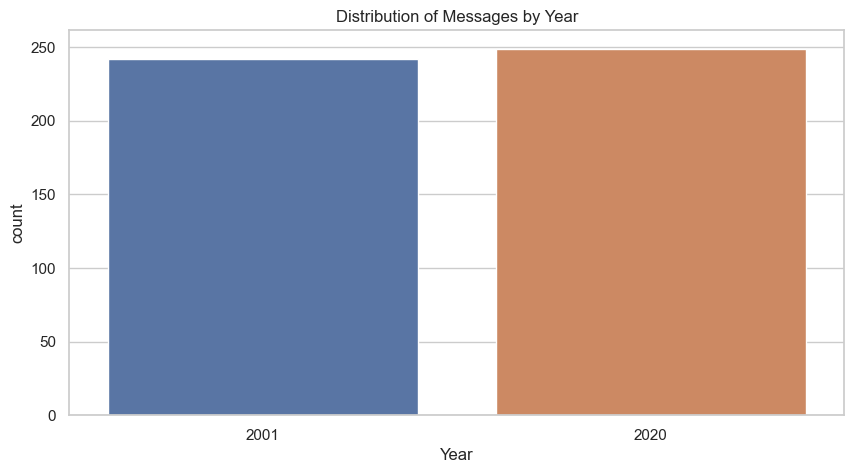

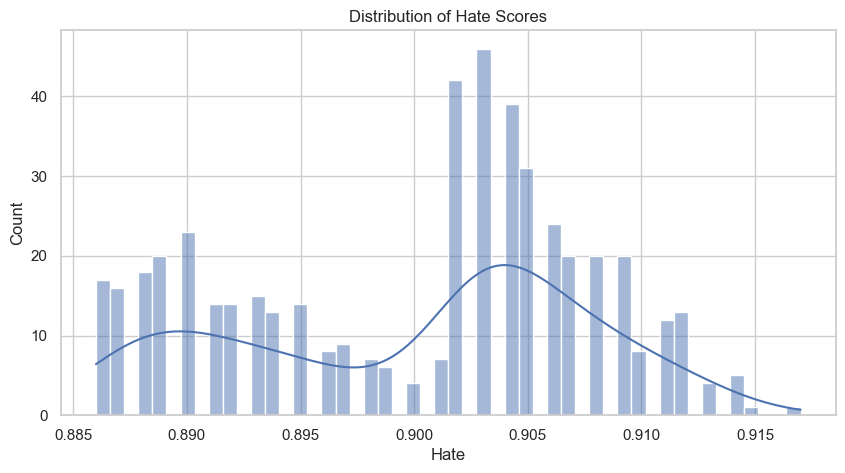

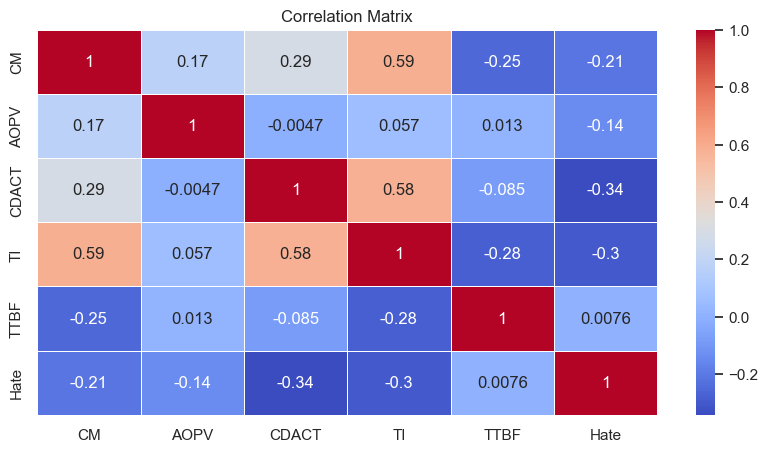

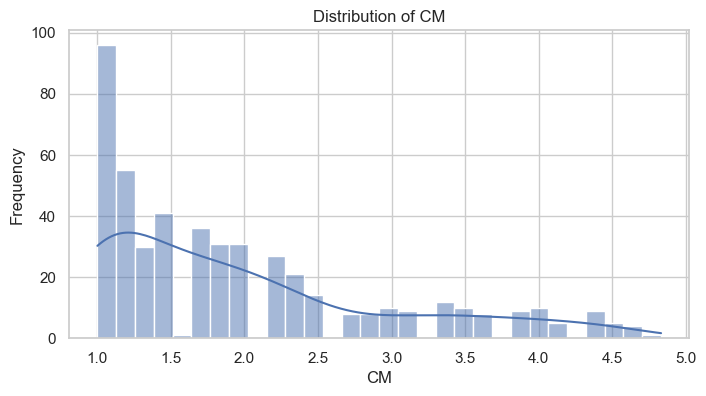

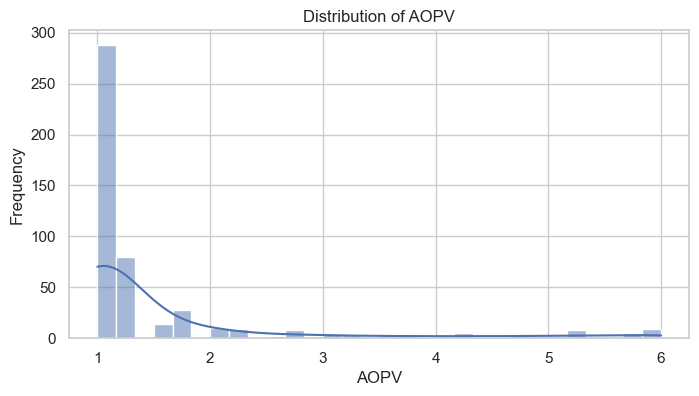

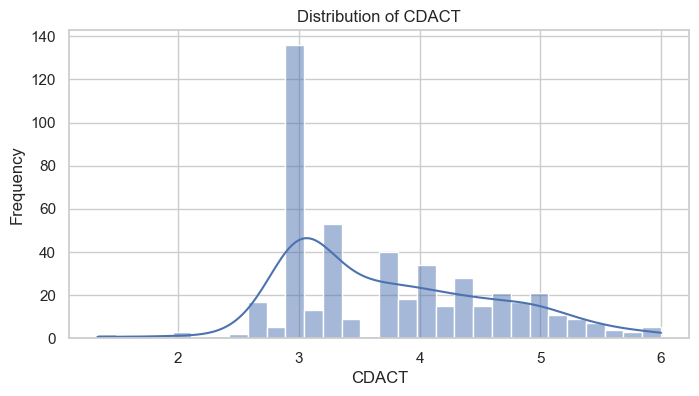

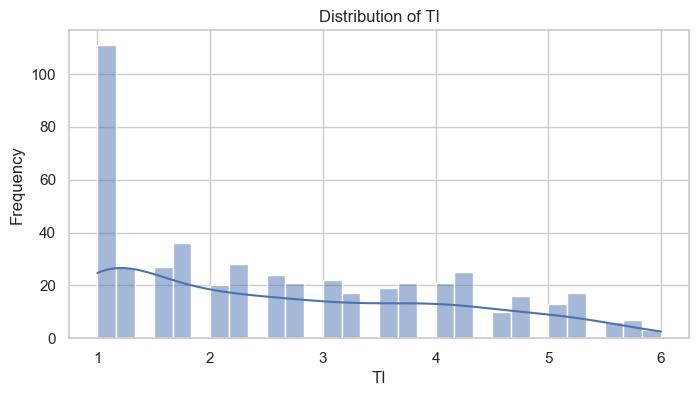

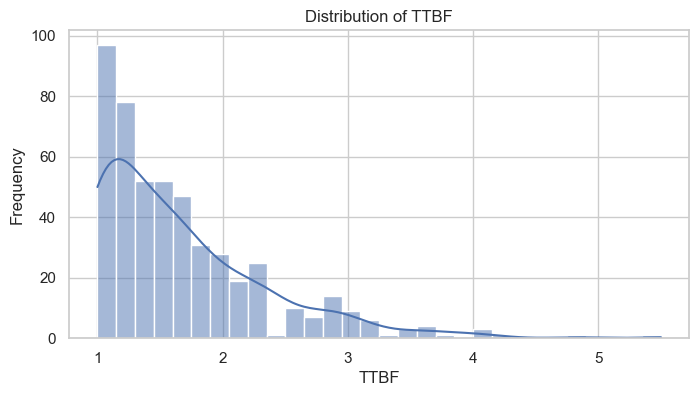

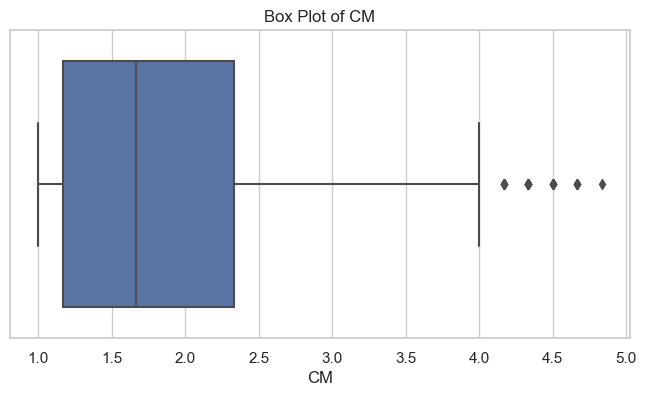

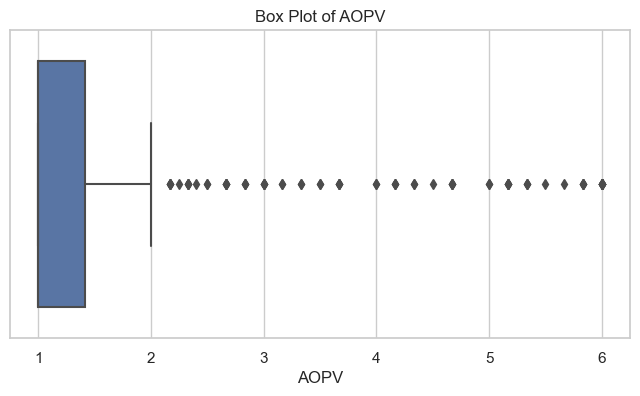

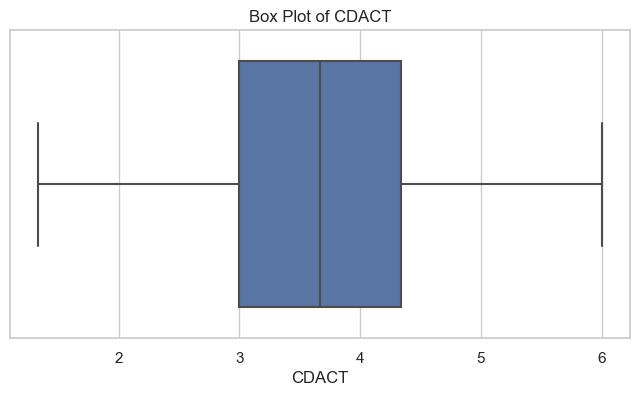

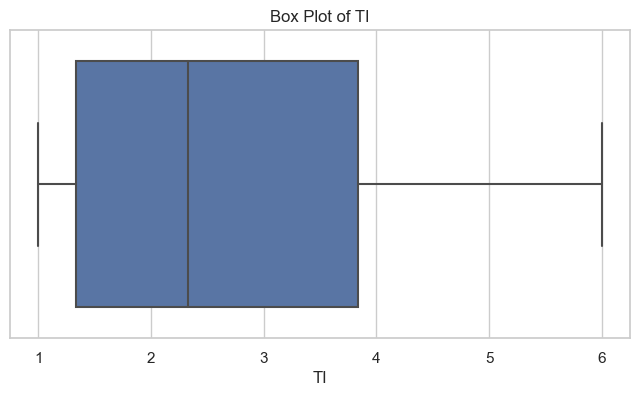

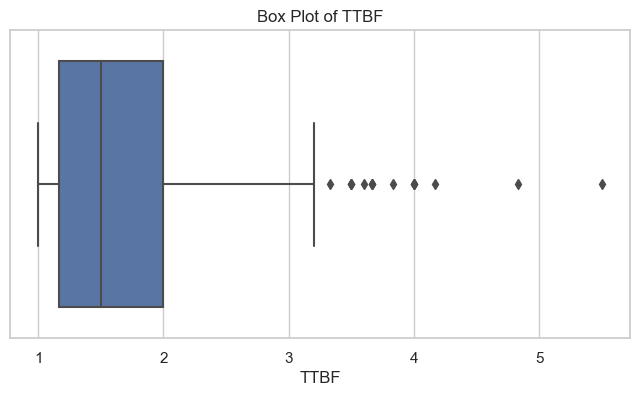

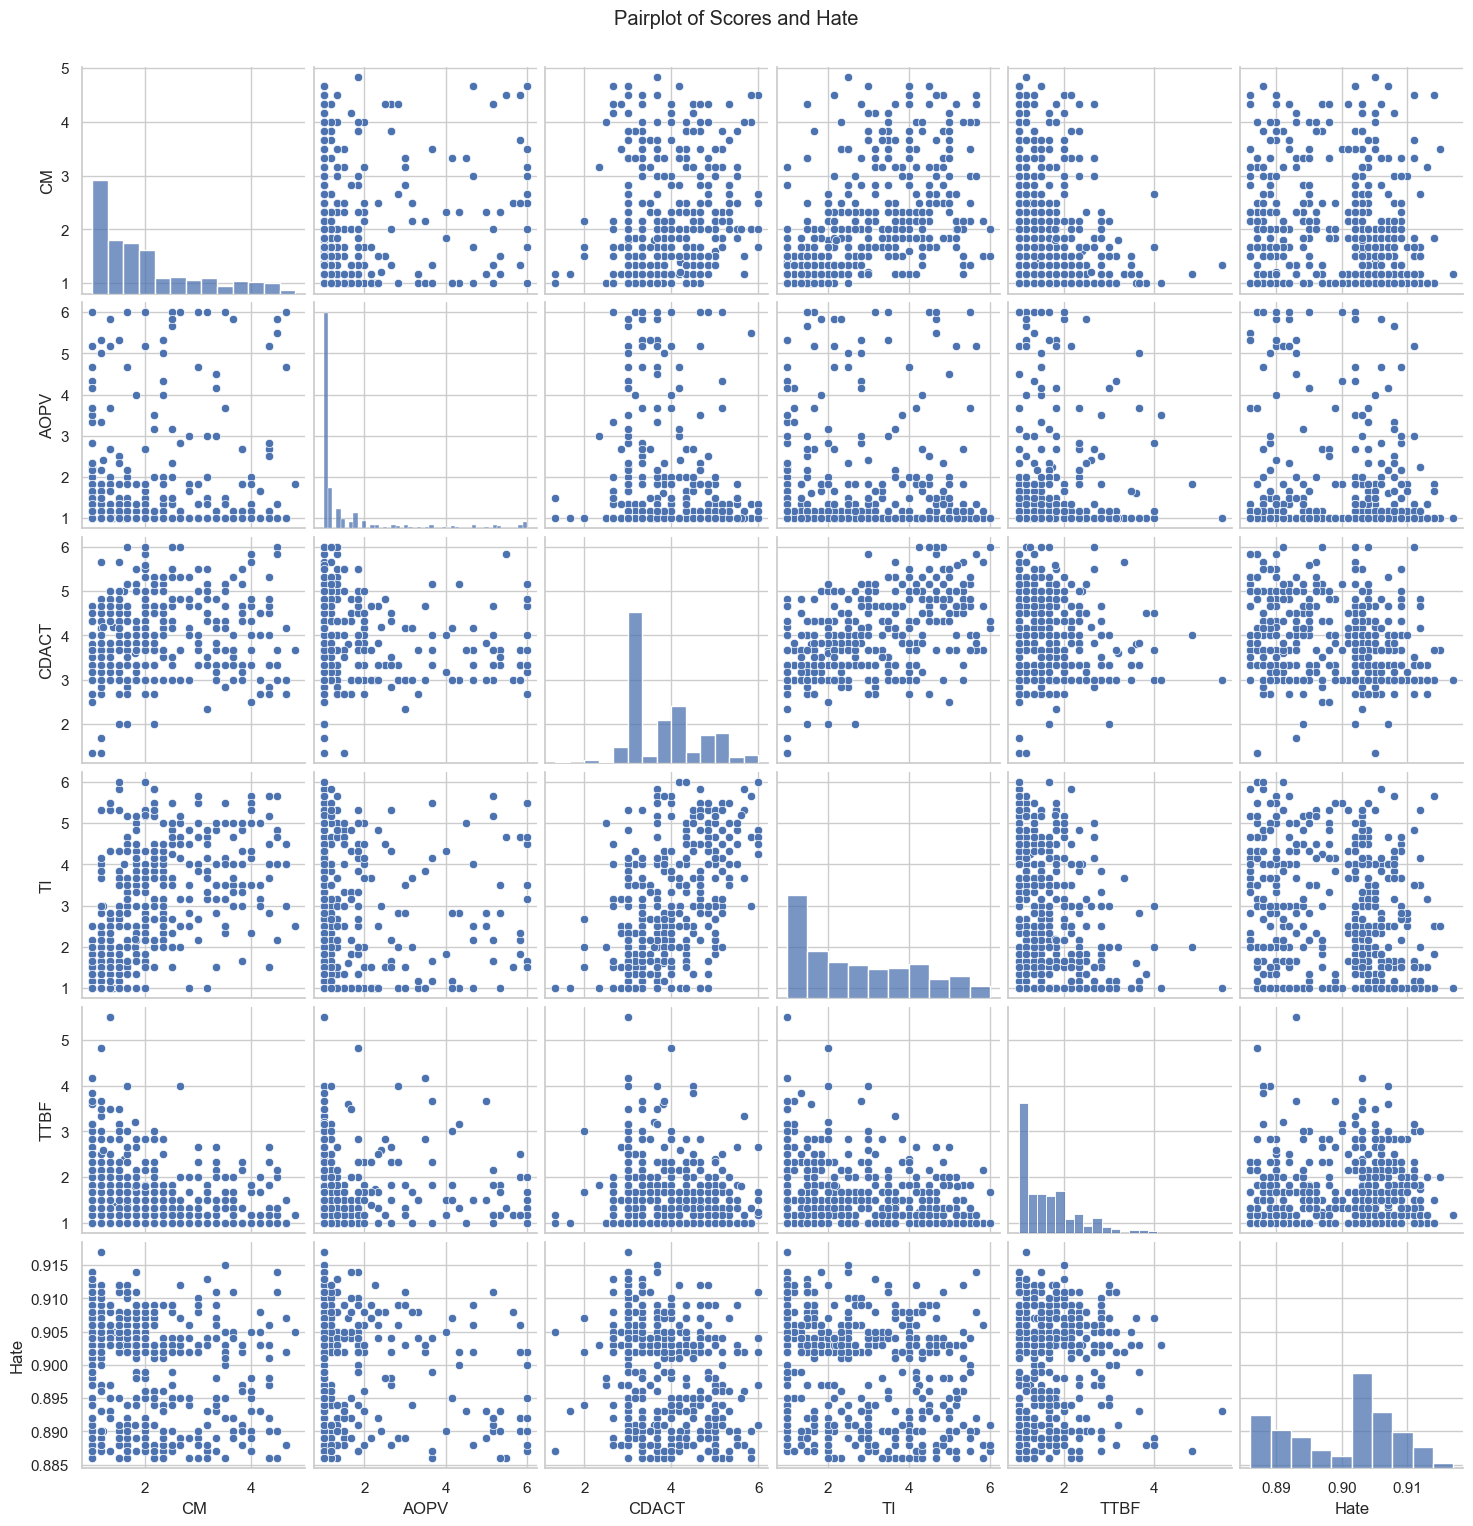

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import joblib

# Set plot style
sns.set(style='whitegrid')

# Load the dataset
df = pd.read_csv('Stormfront_labeled.csv')

# Drop unnecessary columns
df.drop(columns=['English', 'MessageID', 'MessageNumber2'], inplace=True)

# Ensure the 'Year' column is of integer type
df['Year'] = df['Year'].astype(int)

# Display the dataset information
print(df.info())

# Checking for unique MessageNumber values
unique_message_numbers = df['MessageNumber'].nunique()
total_message_numbers = len(df['MessageNumber'])

if unique_message_numbers == total_message_numbers:
    print("All numbers in 'MessageNumber' are unique.")
else:
    print(f"There are duplicates in 'MessageNumber'. Unique values: {unique_message_numbers}, Total values: {total_message_numbers}")

# EDA
# Distribution of messages by year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year')
plt.title('Distribution of Messages by Year')
plt.show()

# Distribution of the hate scores with more bins
plt.figure(figsize=(10, 5))
sns.histplot(df['Hate'], bins=50, kde=True)  # Increased bins to 50
plt.title('Distribution of Hate Scores')
plt.show()

# Correlation analysis between different rating columns
correlation_matrix = df[['CM', 'AOPV', 'CDACT', 'TI', 'TTBF', 'Hate']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution plots for mean scores
columns_to_plot = ['CM', 'AOPV', 'CDACT', 'TI', 'TTBF']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    numeric_data = pd.to_numeric(df[column], errors='coerce')
    sns.histplot(numeric_data, bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for detailed distribution of each score category
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Pairplot for deeper insight into relationships
sns.pairplot(df[['CM', 'AOPV', 'CDACT', 'TI', 'TTBF', 'Hate']])
plt.suptitle('Pairplot of Scores and Hate', y=1.02)
plt.show()
